# Predicting Used Car Prices
## Phase 2: Statistical Modelling

#### Group Name: Project Group 50

#### Name(s) & ID(s) of Group Members: Mohammed Ismail Shareef (S3967638)

## Table of Contents
* Introduction
    + Phase 1 Summary
    + Report Overview
    + Overview of Methodology
* Statistical Modelling
    + Full Model Overview
    + Model Fitting
* Critique and Limitations
* Summary and Conclusions
    + Project Summary
    + Summary of Findings
    + Conclusions
* References

## Introduction

### Phase 1 Summary

During phase 1 of this project, the project commenced by using the data source, Car Detail, from Car Dekho which was sourced from <a href='https://www.kaggle.com/'>Kaggle</a> <a href="https://www.kaggle.com/">(Kaggle. (2019). Kaggle: Your Home for Data Science. Kaggle.com.)</a>. This dataset <a href="https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho">(dataset link)</a> contains the prices of 4340 used cars that were sold through the online car marketplace CarDekho. Firstly, the data was preprocessed to "clean" it. The dataset was mostly "clean", but it required one change, the name attribute of the table included the name of the car as well the model of the car for each car, so this column "name" was modified so that the model of the car was dropped and only the name of the brand of the car remained, which would later help in identifying underlying trends. Next, the "clean" data was plotted to visualise the relationship between the independent variable and the dependent/target variable which was the selling price of the used car. From the visualisation of the data through graphs, multiple associations were identified; it was found that used cars that had a higher selling price generally had a much more recent year of manufacture, were driven a lower number of kilometers, had a lower number of previous owners and had an automatic transmission. Now, in the phase 2 of the project, further analysis will be taken in relation to the phase 1 report and multiple linear regression will be performed to ultimately predict the selling price of a used car.

Additionally, one change will be made to the "clean" data from phase 1 later in phase 2 of this project. The 'year' attribute is numerical, however, this cannot be the case since the year is actually a categorical ordinal variable, so the data type of the 'year' attribute will be changed later in phase 2.

### Report Overview

The multiple linear regression predicts the selling price of a used car using all of the independent features that are in the dataset for CarsDekho. Firstly, the overview of the full model will be provided, this overview will describe the variables and terms that will be used within the regression model. Following this, a full model multiple regression will be applied. Next, the model fitting will be applied and an analysis for the regression results will be explored. This analysis will be based on the plots of the residuals. Then the regression will be critiqued and the limitations of the regression in this part of the project will be explored. Finally, the project will be concluded by summarising the entirety of this project, that is, summarising phase 1 and phase 2. Furthermore, the summary of the findings about the selling price of used cars will be described. Finally, conclusions will be formed in relation to the goals and objectives, that is "to predict the selling price of used cars based on the information about the car such as the make, the number of kilometers it was driven when it was sold, the transmission of the car and so on. This will ultimately aid car dealerships as well as individuals who want to sell their used car(s)" (Phase 1- Ismail Shareef).

### Overview of Methodology

Firstly, all relevant modules to enable doing regression will be imported. Next, some changes will be made to the dataset to fully prepare it for use in multiple regression. These changes will be discussed later in this report. Then, one-hot encoding of the categorical features will be performed so that automatic variable selection can be done when the formula string is constructed for the multiple regression. Next, the formula string for the encoded data is constructed. Finally, the model for the regression is fitted and and the summary of the fitted model is printed so that appropriate analysis can be carried out.

## Statistical Modelling

### Full Model Overview

This model will be used to predict the selling price of a used car through fitting a multiple linear regression that uses all the attribute of the data set, that is, excluding the selling price attribute of course. the variables that will be used in this multiple linear regression model are 'name', 'selling_price',  'year', 'km_driven', 'fuel', 'seller_type', 'transmission' and 'owner'. All of the variables that will be used in this multiple linear regression model are categorical except for the 'selling_price' and 'km_driven' variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

df = pd.read_csv('Phase2_Group50.csv')
df['name'] = df.name.str.split().str.get(0)

#### Change made to dataset ('year' attribute transformed from numerical to categorical feature) 

In [2]:
# The year attribute of the dataset changed to make it an String object because year is a categorical
# variable.
df['year'] = df['year'].astype(str)

In [3]:
# Fourth and above owner corrected to make it fourth owner
df['owner'] = np.where(df['owner'] == 'Fourth & Above Owner', 'Four Owner', df['owner'])
# Name of Mercedes-Benz changed to Mercedes to remove the '-' sign
df['name'] = np.where(df['name'] == 'Mercedes-Benz', 'Mercedes', df['name'])
# Any whitespaces in the dataset replaced by an underscore '_'
df.replace(' ', '_', regex=True, inplace=True)

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First_Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First_Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First_Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First_Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second_Owner


This above set of data shown above is before one-hot encoding is applied.

In [5]:
# one-hot-encoding of categorical features
# for this to work correctly, variable data types (numeric or categorical)
# must be correctly specified within the Pandas dataframe
data_encoded = pd.get_dummies(df, drop_first=True)
data_encoded.head()

,selling_price,km_driven,name_Audi,name_BMW,name_Chevrolet,name_Daewoo,name_Datsun,name_Fiat,name_Force,name_Ford,name_Honda,name_Hyundai,name_Isuzu,name_Jaguar,name_Jeep,name_Kia,name_Land,name_MG,name_Mahindra,name_Maruti,name_Mercedes,name_Mitsubishi,name_Nissan,name_OpelCorsa,name_Renault,name_Skoda,name_Tata,name_Toyota,name_Volkswagen,name_Volvo,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark_Dealer,transmission_Manual,owner_Four_Owner,owner_Second_Owner,owner_Test_Drive_Car,owner_Third_Owner
0,60000,70000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0


Akman, D. D. (2022, October 14). OpenIntro Labs for Python. GitHub. https://github.com/akmand/stats_tutorials/blob/main/regression_case_study_predicting_age_in_census_data.ipynb

The above set of data shown above is after one-hot encoding is applied.

In [6]:
formula_string_indep_vars_encoded = ' + '.join(data_encoded)
formula_string_encoded = 'selling_price ~ ' + formula_string_indep_vars_encoded
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  selling_price ~ selling_price + km_driven + name_Audi + name_BMW + name_Chevrolet + name_Daewoo + name_Datsun + name_Fiat + name_Force + name_Ford + name_Honda + name_Hyundai + name_Isuzu + name_Jaguar + name_Jeep + name_Kia + name_Land + name_MG + name_Mahindra + name_Maruti + name_Mercedes + name_Mitsubishi + name_Nissan + name_OpelCorsa + name_Renault + name_Skoda + name_Tata + name_Toyota + name_Volkswagen + name_Volvo + year_1995 + year_1996 + year_1997 + year_1998 + year_1999 + year_2000 + year_2001 + year_2002 + year_2003 + year_2004 + year_2005 + year_2006 + year_2007 + year_2008 + year_2009 + year_2010 + year_2011 + year_2012 + year_2013 + year_2014 + year_2015 + year_2016 + year_2017 + year_2018 + year_2019 + year_2020 + fuel_Diesel + fuel_Electric + fuel_LPG + fuel_Petrol + seller_type_Individual + seller_type_Trustmark_Dealer + transmission_Manual + owner_Four_Owner + owner_Second_Owner + owner_Test_Drive_Car + owner_Third_Owner


Akman, D. D. (2022, October 14). OpenIntro Labs for Python. GitHub. https://github.com/akmand/stats_tutorials/blob/main/regression_case_study_predicting_age_in_census_data.ipynb

In [7]:
model_full = sm.formula.ols(formula=formula_string_encoded, data=data_encoded)
###
model_full_fitted = model_full.fit()
###
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.129e+31
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:58:59   Log-Likelihood:                 86070.
No. Observations:                4340   AIC:                        -1.720e+05
Df Residuals:                    4272   BIC:                        -1.716e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

Akman, D. D. (2022, October 14). OpenIntro Labs for Python. GitHub. https://github.com/akmand/stats_tutorials/blob/main/regression_case_study_predicting_age_in_census_data.ipynb

From the OLS Regression Results table above, it can be seen that the r-squared value is 1.000, this means that 100% of the variance can be explained by the model. Additionally, from the results, it can also be said that a lot of the p-values are significant although, there also seems to be quite a few p-values that are not significant.

In [8]:
residuals_full = pd.DataFrame({'actual': data_encoded['selling_price'], 
                               'predicted': model_full_fitted.fittedvalues, 
                               'residual': model_full_fitted.resid})
residuals_full.head()

,actual,predicted,residual
0,60000,60000.0,6.257324e-10
1,135000,135000.0,6.111804e-10
2,600000,600000.0,4.656613e-10
3,250000,250000.0,2.910383e-11
4,450000,450000.0,6.402843e-10


Akman, D. D. (2022, October 14). OpenIntro Labs for Python. GitHub. https://github.com/akmand/stats_tutorials/blob/main/regression_case_study_predicting_age_in_census_data.ipynb

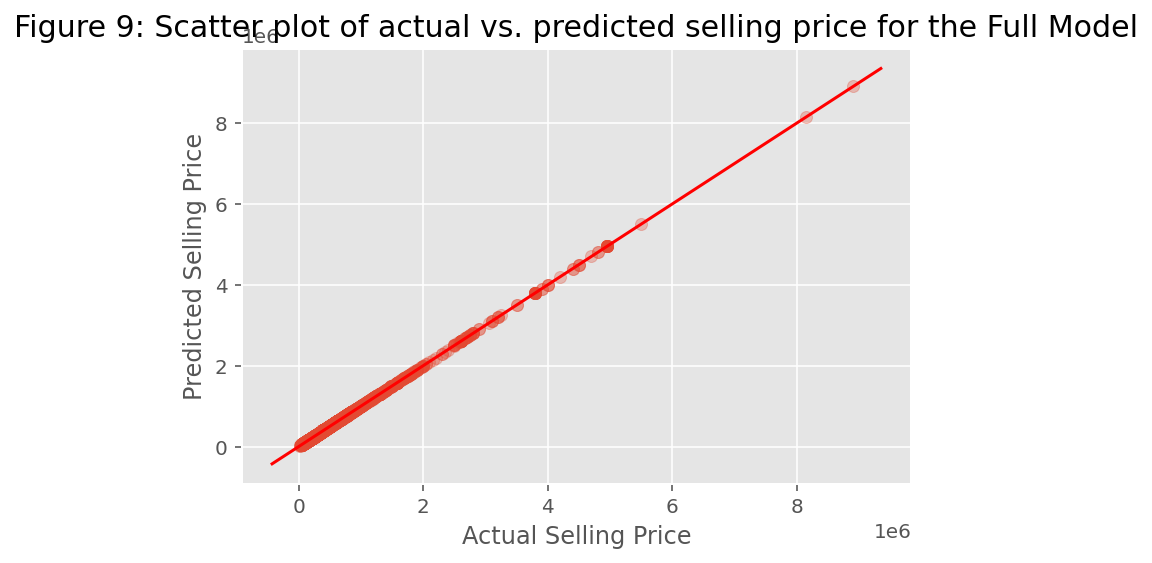

In [9]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

# Creating scatter plot
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Selling Price');
plt.ylabel('Predicted Selling Price');
plt.title('Figure 9: Scatter plot of actual vs. predicted selling price for the Full Model', fontsize=15);
plt.show();

Akman, D. D. (2022, October 14). OpenIntro Labs for Python. GitHub. https://github.com/akmand/stats_tutorials/blob/main/regression_case_study_predicting_age_in_census_data.ipynb

In the model shown above, the maximum predicted value is 8*e^6, however the maximum actual selling price is 8900000.

#### Full Model Diagnostic Checks

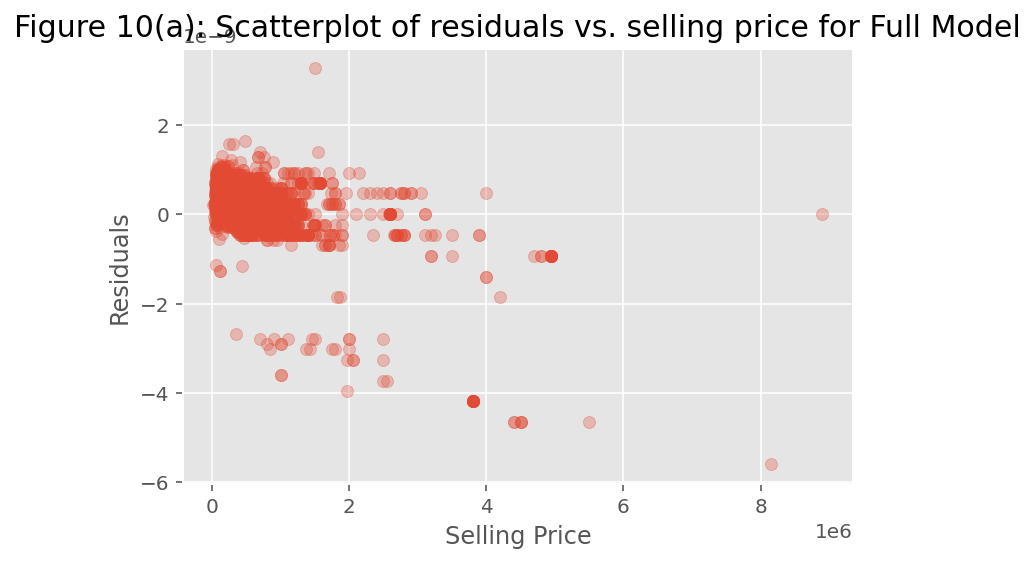

In [10]:
plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Selling Price');
plt.ylabel('Residuals')
plt.title('Figure 10(a): Scatterplot of residuals vs. selling price for Full Model', fontsize=15)
plt.show();

Akman, D. D. (2022, October 14). OpenIntro Labs for Python. GitHub. https://github.com/akmand/stats_tutorials/blob/main/regression_case_study_predicting_age_in_census_data.ipynb

From the model shown above, the pattern is mostly random and mostly centered around 0. This validates the fact that the constant variability assumption of linear regression is fulfilled.

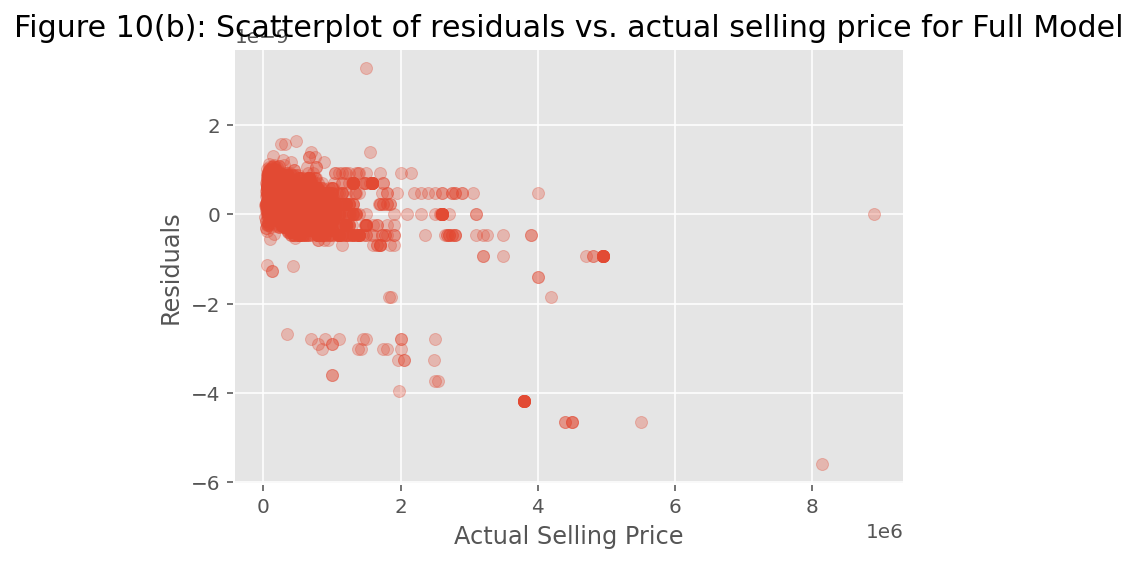

In [11]:
plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Actual Selling Price');
plt.ylabel('Residuals')
plt.title('Figure 10(b): Scatterplot of residuals vs. actual selling price for Full Model', fontsize=15)
plt.show();

Akman, D. D. (2022, October 14). OpenIntro Labs for Python. GitHub. https://github.com/akmand/stats_tutorials/blob/main/regression_case_study_predicting_age_in_census_data.ipynb

From the model shown above, the scatterplots of residuals vs actual selling price matches that of the scatterplot of the residual and predicted selling price.

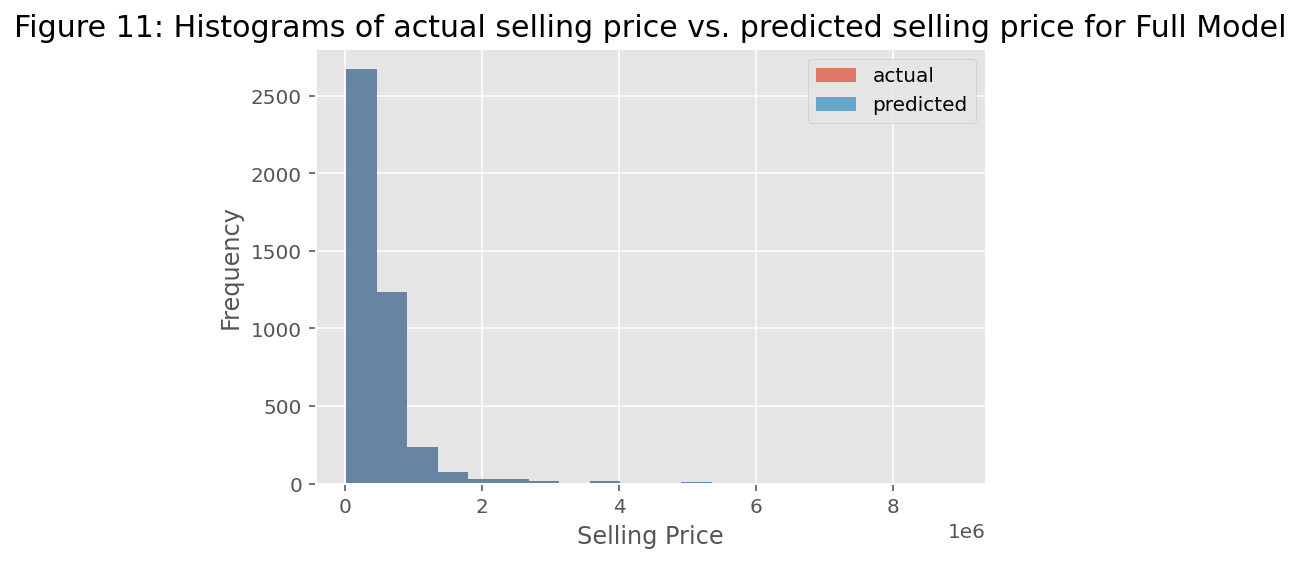

In [12]:
plt.hist(residuals_full['actual'], label='actual', bins=20, alpha=0.7);
plt.hist(residuals_full['predicted'], label='predicted', bins=20, alpha=0.7);
plt.xlabel('Selling Price');
plt.ylabel('Frequency');
plt.title('Figure 11: Histograms of actual selling price vs. predicted selling price for Full Model', fontsize=15);
plt.legend()
plt.show();


Akman, D. D. (2022, October 14). OpenIntro Labs for Python. GitHub. https://github.com/akmand/stats_tutorials/blob/main/regression_case_study_predicting_age_in_census_data.ipynb

The histograms of the actual and predicted selling price seem to be overlapping each other quite perfectly from the histogram shown above.

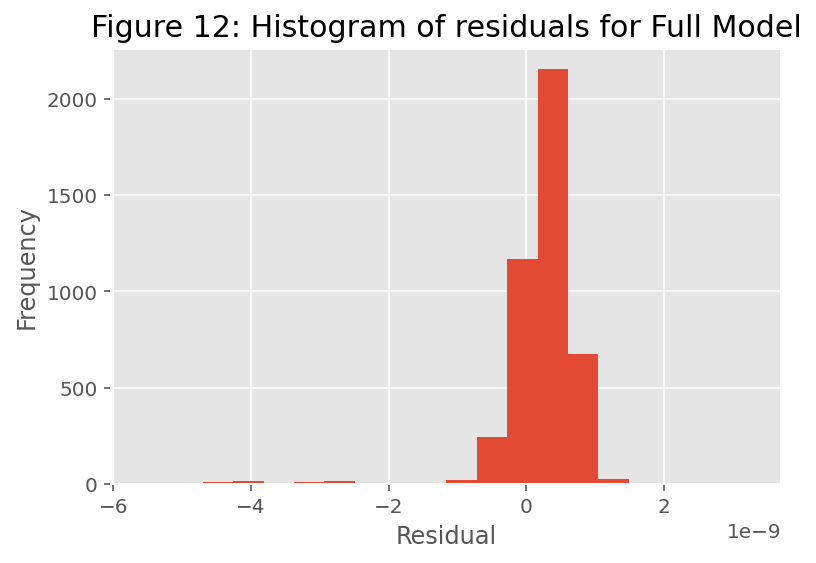

In [13]:
plt.hist(residuals_full['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 12: Histogram of residuals for Full Model', fontsize=15);
plt.show();

Akman, D. D. (2022, October 14). OpenIntro Labs for Python. GitHub. https://github.com/akmand/stats_tutorials/blob/main/regression_case_study_predicting_age_in_census_data.ipynb

From the histogram above of the residuals, it can be seen that the histogram is somewhat symmetric, however, it seems to be slightly more positively skewed. This indicates that the normality assumption of linear regression is somewhat violated in the full model.

### Reduced Model

In [14]:
## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula_string_encoded)

# initialize feature-selected fit to full model
linreg_fit = model_full_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    # uncomment the line below if you would like to see the regression summary
    # in each step:
    ### print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    

    linreg_fit = smf.ols(formula=patsy_description, data=data_encoded).fit()

###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = data_encoded).fit()
###

#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "name_MG" with p-value 0.6548

Removing term "name_Kia" with p-value 1.0

Removing term "name_Fiat" with p-value 1.0

Removing term "name_BMW" with p-value 1.0

Removing term "name_Jaguar" with p-value 1.0

Removing term "fuel_Electric" with p-value 0.9176

Removing term "fuel_Petrol" with p-value 0.9048

Removing term "name_Tata" with p-value 1.0

Removing term "name_Chevrolet" with p-value 0.8951

Removing term "owner_Third_Owner" with p-value 0.9629

Removing term "name_Volkswagen" with p-value 1.0

Removing term "name_OpelCorsa" with p-value 0.8692

Removing term "year_2012" with p-value 0.9988

Removing term "year_2006" with p-value 0.9829

Removing term "year_1995" with p-value 0.9895

Removing term "name_Land" with p-value 1.0

Removing term "year_2000" with p-value 0.9688

Removing term "year_2017" with p-value 1.0

Removing term "name_Mahindra" with p-value 0.9607

Removing term "year_2003" with p-value 0.9

Akman, D. D. (2022, October 14). OpenIntro Labs for Python. GitHub. https://github.com/akmand/stats_tutorials/blob/main/regression_case_study_predicting_age_in_census_data.ipynb

In [15]:
residuals_reduced = pd.DataFrame({'actual': data_encoded['selling_price'], 
                                  'predicted': model_reduced_fitted.fittedvalues, 
                                  'residual': model_reduced_fitted.resid})
residuals_reduced.head()

,actual,predicted,residual
0,60000,60000.0,-2.692104e-10
1,135000,135000.0,-2.328306e-10
2,600000,600000.0,0.000000e+00
3,250000,250000.0,-8.731149e-11
4,450000,450000.0,1.164153e-10


Akman, D. D. (2022, October 14). OpenIntro Labs for Python. GitHub. https://github.com/akmand/stats_tutorials/blob/main/regression_case_study_predicting_age_in_census_data.ipynb

From the OLS Regression Results table above for the reduced model, the r-squared value is 1.000, this means that 100% of the variance can be explained by the model.

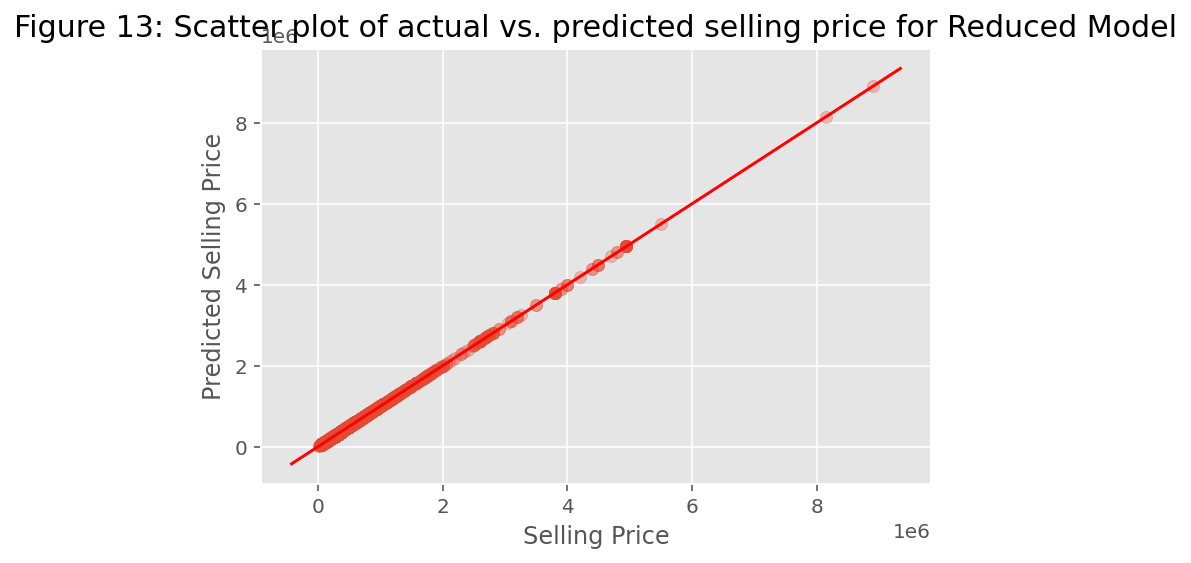

In [16]:
# get a scatter plot
plt.scatter(residuals_reduced['actual'], residuals_reduced['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Selling Price');
plt.ylabel('Predicted Selling Price');
plt.title('Figure 13: Scatter plot of actual vs. predicted selling price for Reduced Model', fontsize=15);
plt.show(); 

Akman, D. D. (2022, October 14). OpenIntro Labs for Python. GitHub. https://github.com/akmand/stats_tutorials/blob/main/regression_case_study_predicting_age_in_census_data.ipynb

This scatterplot of actual vs. predicted selling price for the reduced model mirrors the scatterplot of actual vs. predicted selling price for the full model.

#### Reduced Model Diagnostic Tests

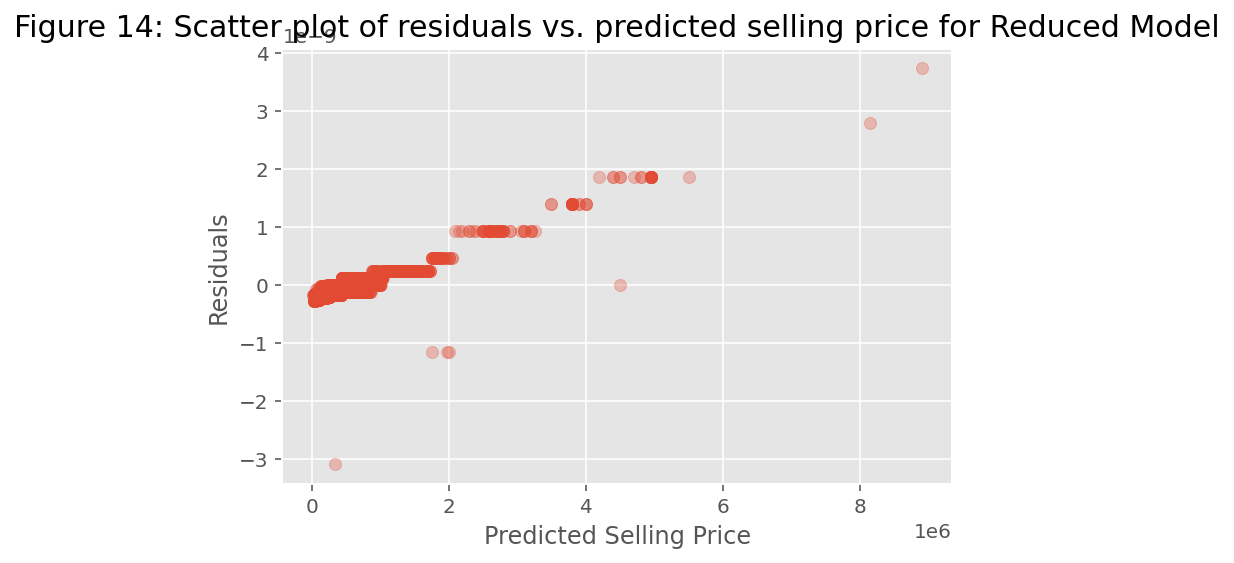

In [17]:
plt.scatter(residuals_reduced['predicted'], residuals_reduced['residual'], alpha=0.3);
plt.xlabel('Predicted Selling Price');
plt.ylabel('Residuals')
plt.title('Figure 14: Scatter plot of residuals vs. predicted selling price for Reduced Model', fontsize=15)
plt.show();

Akman, D. D. (2022, October 14). OpenIntro Labs for Python. GitHub. https://github.com/akmand/stats_tutorials/blob/main/regression_case_study_predicting_age_in_census_data.ipynb

The banding pattern for the reduced models is quite different to the banding pattern of the full model, however, the pattern is still mostly centered around zero even  though there seems to be pattern which is not very random.

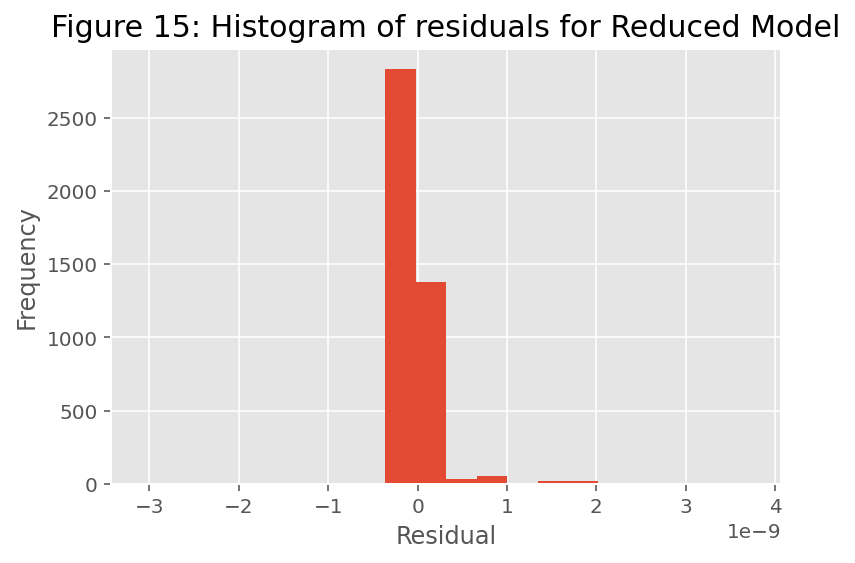

In [18]:
plt.hist(residuals_reduced['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 15: Histogram of residuals for Reduced Model', fontsize = 15)
plt.show();

Akman, D. D. (2022, October 14). OpenIntro Labs for Python. GitHub. https://github.com/akmand/stats_tutorials/blob/main/regression_case_study_predicting_age_in_census_data.ipynb

From the histogram above, the histogram is not very symmetric and in fact, seems to be positively skewed, which means that the residuals are not really normally distributed.

## Summary and Conclusions

### Project Summary

During phase 1 of this project, the project commenced by using the data source, Car Detail, from Car Dekho which was sourced from <a href='https://www.kaggle.com/'>Kaggle</a> <a href="https://www.kaggle.com/">(Kaggle. (2019). Kaggle: Your Home for Data Science. Kaggle.com.)</a>. This dataset <a href="https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho">(dataset link)</a> contains the prices of 4340 used cars that were sold through the online car marketplace CarDekho. Firstly, the data was preprocessed to "clean" it. The dataset was mostly "clean", but it required one change, the name attribute of the table included the name of the car as well the model of the car for each car, so this column "name" was modified so that the model of the car was dropped and only the name of the brand of the car remained, which would later help in identifying underlying trends. Next, the "clean" data was plotted to visualise the relationship between the independent variable and the dependent/target variable which was the selling price of the used car. From the visualisation of the data through graphs, multiple associations were identified (Credit - Ismail Shareef). Now, in the phase 2 of the project, further analysis will be taken in relation to the phase 1 report and multiple linear regression will be performed to ultimately predict the selling price of a used car. Later, a few changes were made to the "clean" data from phase 1 in phase 2 of this project. The 'year' attribute is numerical, however, this cannot be the case since the year is actually a categorical ordinal variable, so the data type of the 'year' attribute was changed in phase 2. Furthermore, the name of the brand 'Mercedes-Benz' was changed to 'Mercedes' in order for the regression model to work and finally, some whitespaces were still present in some of the data objects, so this was corrected to fill in any whitespaces with underscores within the data in the dataset.
Then all relevant modules to enable regression were be imported. One-hot encoding of the categorical features was then performed. Next, the formula string for the encoded data was constructed. Finally, the model for the regression is fitted and and the summary of the fitted model was printed so that appropriate analysis can be carried out. After the appropriate analysis was carried out, diagnostic tests were carried out on both the full model and reduced model, and it was found that some breaches were made in relation to the regression assumptions. 

### Summary of Findings

The main focus of the project was to find out the influence of independent variables that were 'name',  'year', 'km_driven', 'fuel', 'seller_type', 'transmission' and 'owner' on the selling price of the used car. This was found in phase 1 of the report. However, further on in phase 2 of the report, the full model of the multiple regression was applied to the dataset and an r-square value of 1.000 (100%) was obtained. This means that 100% of the variation in the selling price of a car can be explained by the attributes that were used in the multiple regression. There is a strong, positive association between the attributes and the selling price of the car since the r squared value is 1.000. Additionally, in the diagnostic check for the full model, the pattern was random and mostly centered around 0 which meant that the constant variability assumption of linear regression is fulfilled. Furthermore, there was a slight breach in the normality assumption on the residuals of the full model as the histogram of the residuals was not fully symmetric and was in fact, slightly more positively skewed. However, ultimately, the multiple regression on this dataset was successful.

### Conclusions

What was found about the problem is that 100% of the variation in selling price of a car can be explained by the independent variables. And because of this, it can be concluded quite confidently that  used cars that had a higher selling price generally had a much more recent year of manufacture, were driven a lower number of kilometers, had a lower number of previous owners and had an automatic transmission. Ultimately, this multiple regression can be used to predict the selling price of a used car with assurance and hence, the goal which was set out in phase 1, that is, to aid car dealerships and individuals who want to sell or buy used cars can be fulfilled. Thank you for your time to read and hopefully, understand my report.

### References

- <a href="https://www.kaggle.com/">Kaggle. (2019). Kaggle: Your Home for Data Science. Kaggle.com.</a>
- <a href="https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho">Vehicle dataset. (n.d.). Www.kaggle.com. https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho</a>
- <a href="https://github.com/akmand/stats_tutorials/blob/main/regression_case_study_predicting_age_in_census_data.ipynb">Akman, D. D. (2022, October 14). OpenIntro Labs for Python. GitHub. </a>